# Analysis of my expenses

## Reading in the dataframe

The dataframe contains data about my personal expenses in the period <b>February 26th - April 14th</b>.

First, let's import the necessary libraries

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

Now, we will read in the data set and examine it

In [38]:
df = pd.read_csv('Data.csv')
df.head(5)

,KPMG;1;1823.75;2023-04-14 17:16:44;
0,Other;1;80.0;2023-04-14 01:20:59;
1,Sale of assets ;1;15.0;2023-04-07 00:40:29;
2,KPMG;1;1037.75;2023-04-06 10:43:56;
3,Jacob;1;428.61;2023-04-03 22:07:46;
4,Jacob;1;914.0200000000001;2023-04-03 22:06:30;


### Wow, the data is quite messy. Let's change how we import it:

In [39]:
df = pd.read_csv('Data.csv', sep=';', names=['Category', 'Is income?', 'Amount (EUR)', 'Date', 'Description'])
df.head()

,Category,Is income?,Amount (EUR),Date,Description
0,KPMG,1,1823.75,2023-04-14 17:16:44,NaN
1,Other,1,80.00,2023-04-14 01:20:59,NaN
2,Sale of assets,1,15.00,2023-04-07 00:40:29,NaN
3,KPMG,1,1037.75,2023-04-06 10:43:56,NaN
4,Jacob,1,428.61,2023-04-03 22:07:46,NaN


Much better :)

# Data cleaning

There's no need to keep <b>'Is income?'</b> column in the data frame, as we want to analyze expenses only. So, we'll just subset expenses.

In [40]:
expenses_df = df[df['Is income?'] == 0]

In [41]:
expenses_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 10 to 287
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      278 non-null    object 
 1   Is income?    278 non-null    int64  
 2   Amount (EUR)  278 non-null    float64
 3   Date          278 non-null    object 
 4   Description   71 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.0+ KB


Now, let's make <b>'Date'</b> column as date type, and remove the <b>'Is income?'</b> column.

In [42]:
expenses_df = expenses_df.drop('Is income?', axis = 1)

In [43]:
expenses_df['Date'] = pd.to_datetime(expenses_df['Date']).dt.date # we only keep the date, no need to keep the time

In [44]:
expenses_df.head(5)

,Category,Amount (EUR),Date,Description
10,Debts,30.0,2023-04-14,NaN
11,Shopping,40.0,2023-04-13,NaN
12,Groceries,10.0,2023-04-12,NaN
13,Pharmacy,30.0,2023-04-12,NaN
14,Food / Eating out,3.2,2023-04-12,NaN


In [45]:
expenses_df.describe()

,Amount (EUR)
count,278.000000
mean,21.718489
std,55.013932
min,0.600000
25%,3.985000
50%,7.800000
75%,15.137500
max,490.000000


From the .describe() statistics above - we see that:
* There has been a total of <b>278</b> transactions during the period. 
* The mean transaction amount is <b>21.7 EUR</b>.
* The biggest transaction was <b>490 EUR</b>, and the lowest was <b>0.6 cents</b>.

Curious, what were those transactions?

### Lowest Transaction

In [46]:
expenses_df.loc[expenses_df['Amount (EUR)'] == 0.6, ['Category', 'Date']]

,Category,Date
26,Groceries,2023-04-10


The lowest transaction was 60 cent when I bought some <b>groceries</b>. Not sure what it was.

### Biggest transaction

In [47]:
expenses_df.loc[expenses_df['Amount (EUR)'] == 490, ['Category', 'Date']]

,Category,Date
184,Home,2023-03-16


Biggest transaction was in category <b>'Home'</b> - most likely it was rent payment for the month.

What were some other big transactions I've had? Let's look at the top 5.

In [48]:
expenses_df.sort_values('Amount (EUR)', ascending = False).head(5)

,Category,Amount (EUR),Date,Description
184,Home,490.00,2023-03-16,NaN
87,Debts,425.00,2023-04-03,NaN
262,Debts,350.00,2023-03-03,Roman debt
263,Home,317.69,2023-03-03,Utilities + deposit for new appartment
57,Home,278.59,2023-04-06,NaN


Some of the biggest transactions are payments for <b>rent, utilities</b> and <b>debt repayment</b>.

In [49]:
expenses_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 10 to 287
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      278 non-null    object 
 1   Amount (EUR)  278 non-null    float64
 2   Date          278 non-null    object 
 3   Description   71 non-null     object 
dtypes: float64(1), object(3)
memory usage: 10.9+ KB


# What questions do I want to have answered?

Well, it makes the most sense to start looking at a bigger question - how do I cut my expenses?

Maybe, I need to identify the biggest spending categories I have...

1. I need to see what categories I have the most spendings in
2. What's the total spending by category?
3. What's the spending in % by category?
4. How much have I spent in total in that period?
5. I need to look how my spending varies over a month.

## 1. Let's see where we have the most transactions

In [50]:
expenses_df['Category'].value_counts()

Groceries               53
Food / Eating out       52
Coffeeshop              23
Wolt                    22
Taxi                    19
Snacks                  16
Shopping                15
Drogas                  13
Bar / Drinks            11
Online Subscriptions    10
Pharmacy                 8
Debts                    6
Travel                   5
Vape                     3
English for liza         3
Sports                   3
Home                     3
Services                 3
TET INTERNET             2
Church                   2
Finance                  2
Donation                 1
Gifts                    1
Transport                1
Entertainment            1
Name: Category, dtype: int64

The most transactions I've made doing <b>grocery</b> shopping, in <b>coffeeshops</b>, <b>eating out</b>, <b>ordering food on Wolt</b>, <b>taxi</b>, <b>snacks</b>, and others..

## 2. What's the total spendings by categories?

In [51]:
grouped_df = expenses_df.groupby(by='Category').sum().sort_values('Amount (EUR)', ascending = False)
grouped_df

/var/folders/lb/ycks6x5j701fgf187k28xkn80000gn/T/ipykernel_28459/1571428781.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = expenses_df.groupby(by='Category').sum().sort_values('Amount (EUR)', ascending = False)


,Amount (EUR)
Category,
Debts,1214.31
Home,1086.28
Food / Eating out,757.61
Shopping,708.62
Groceries,396.30
Travel,340.82
Wolt,319.44
Bar / Drinks,198.79
Taxi,192.50


### Let's vizualize what I have above. 

In [52]:
grouped_df.reset_index(inplace=True)

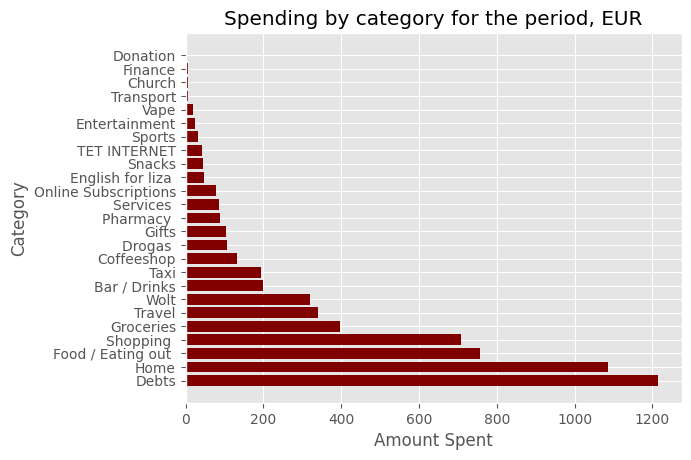

In [53]:
plt.style.use('ggplot')

plt.barh(grouped_df['Category'], grouped_df['Amount (EUR)'], color='maroon')

plt.xlabel('Amount Spent')
plt.ylabel('Category')
plt.title('Spending by category for the period, EUR')

plt.show()

hm... That's quite informative actually. There are definitely categories that I could've lived without that could save me lots of cash. 

### 3. Let me see what those values are as a % of total spendings...

#### First, I'll calcualte the total spending which will actually answer question number 4

In [54]:
total_spending = expenses_df['Amount (EUR)'].sum()
print('My total spending for the period is', total_spending)

My total spending for the period is 6037.74


Oh wow... I literally blew <b>6 grand</b> in 1.5 months... that's quite nervewrecking if you think about it.

#### Next, I'll add a new column with percentage of total spendings

In [55]:
expenses_df['Percentage of total %'] = expenses_df['Amount (EUR)'] / total_spending * 100
expenses_df['Percentage of total %'] = round(expenses_df['Percentage of total %'], 2)

In [56]:
expenses_df.head()

,Category,Amount (EUR),Date,Description,Percentage of total %
10,Debts,30.0,2023-04-14,NaN,0.50
11,Shopping,40.0,2023-04-13,NaN,0.66
12,Groceries,10.0,2023-04-12,NaN,0.17
13,Pharmacy,30.0,2023-04-12,NaN,0.50
14,Food / Eating out,3.2,2023-04-12,NaN,0.05


In [57]:
grouped_df2 = expenses_df.groupby(by='Category').sum('Percentage of total %').sort_values('Percentage of total %', ascending = False)
grouped_df2

,Amount (EUR),Percentage of total %
Category,,
Debts,1214.31,20.12
Home,1086.28,17.99
Food / Eating out,757.61,12.55
Shopping,708.62,11.73
Groceries,396.30,6.58
Travel,340.82,5.64
Wolt,319.44,5.29
Bar / Drinks,198.79,3.30
Taxi,192.50,3.17


### Let's vizualize it now

In [58]:
grouped_df2.reset_index(inplace=True)

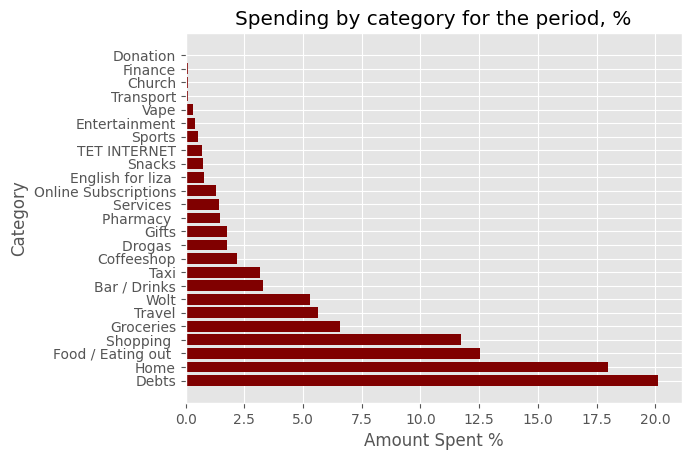

In [60]:
plt.style.use('ggplot')

plt.barh(grouped_df2['Category'], grouped_df2['Percentage of total %'], color='maroon')

plt.xlabel('Amount Spent %')
plt.ylabel('Category')
plt.title('Spending by category for the period, %')

plt.show()

<b>What did I learn from this?</b> Well, many categories could've been cut off which would have resulted in higher savings. 

For examples, the following categories are really unnecesarry for comfortable life:
* Vape
* Entertainment
* Snacks
* Gifts
* Coffeeshop
* Bar / Drinks
* Wolt
* Travel

#### Let's see how much I could've saved if I didn't spend in those categories.

In [62]:
categories = ['Vape', 'Entertainment', 'Snacks', 'Gifts', 'Coffeeshop', 'Bar / Drinks', 'Wolt', 'Travel']
expenses_df.loc[expenses_df['Category'].isin(categories), ['Category', 'Amount (EUR)', 'Percentage of total %']].groupby(by='Category').sum()

,Amount (EUR),Percentage of total %
Category,,
Bar / Drinks,198.79,3.30
Coffeeshop,131.32,2.17
Entertainment,24.00,0.40
Gifts,104.89,1.74
Snacks,45.41,0.74
Travel,340.82,5.64
Vape,19.48,0.33
Wolt,319.44,5.29


In [63]:
potential_savings = expenses_df.loc[expenses_df['Category'].isin(categories), ['Amount (EUR)']].sum()
print("I could've saved EUR", int(potential_savings))

I could've saved EUR 1184


## 5. Finally, let's plot our daily spendings

In [64]:
# group the transactions by day and calculate the total amount for each day

daily_totals = expenses_df.groupby('Date')['Amount (EUR)'].sum()
daily_totals = pd.DataFrame(daily_totals)
daily_totals.reset_index(inplace=True)

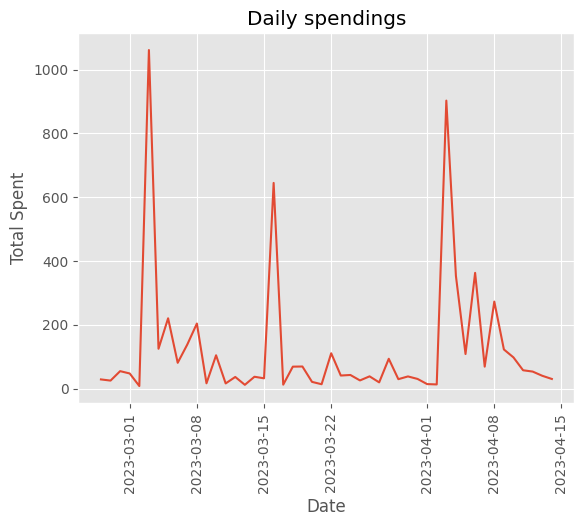

In [65]:
plt.plot(daily_totals['Date'], daily_totals['Amount (EUR)'])

plt.xlabel('Date')
plt.ylabel('Total Spent')
plt.title('Daily spendings')
plt.xticks(rotation=90)

plt.show()

Interesting, looks like spendings are made in spikes. That's probably because most spendings are done when utilitiy bills come in.

#### I see that one of the biggest spending categories is coffee shops - many transactions are made in that category:
* 23 transactions 
* EUR 131.31 is spent on coffee

That's EUR <b>EUR 5.71</b> per visit.

23 transactions in 48 days means I get coffee in coffeeshop, on average, every 2 days.

That is <b>182</b> cups of takeout coffee a year.

If I visit coffeeshops at my current frequency (once every 2 days) - that means I spend <b> EUR 1039.22 </b> on coffee alone.

### That means a EUR 500 coffeemachine is definitely worth buying

In [72]:
print(round((131.31 / 23), 2))

5.71


In [71]:
print(round((48 / 23), 2))

2.09


In [74]:
print(5.71 * 182)

1039.22


## Key Takeaways:
* Cutting expenses in categories (Vape, Entertainment, Snacks, Gifts, Coffeeshop, Bar / Drinks, Wolt, Travel) could result in EUR 1,184 savings
* Coffee Machine is Worth Buying
* Average spending per month is <b>EUR 3,773.59</b> - that is hell of a lot of cash. 

Meaning to support my current lifestyle I need to be making NET around EUR 4,000 as a data analyst.

In [81]:
# Calcualting average monthly spending:
print(round((total_spending * 30 / 48), 2))

3773.59
